#### Guided Project Exploring Hacker News Posts


[Oryginal Dataset](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts)
[Download data for this project](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts)

In [21]:
#Data read

from csv import reader
import requests
URL = "https://dq-content.s3.amazonaws.com/356/hacker_news.csv"
response = requests.get(URL)

open("hacker_news.csv", "wb").write(response.content)
from csv import reader
opened_file=open('hacker_news.csv')
read_file=reader(opened_file)
data=list(read_file)
data_header=data[0]
data=data[1:]
print(data_header)
print(data[0])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


Data explanation
|variable|meaning|
| --- | --- |
|id| the unique identifier from Hacker News for the post|
|title | the title of the post|
|url| the URL that the posts links to, if the post has a URL|
|num_points | the number of points the post acquired, calculated as the otal number of upvotes minus the total number of downvotes|
|num_comments | the number of comments on the post|
|author | the username of the person who submitted the post|
|created_at | the date and time of the post's submission|

We're specifically interested in posts with titles that begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question. Below are a few examples:

In [22]:

ask_posts = []
show_posts = []
other_posts = []
for post in data:
    title = post[1]
    title = title.lower()
    if title.startswith('ask hn'):
        ask_posts.append(post)
    elif title.startswith('show hn'):
        show_posts.append(post)
    else:
        other_posts.append(post)
#verification
print(ask_posts[:2])
print(show_posts[:2])
print(other_posts[:2])
print("Comparison of dataset lengths to determine if above step was performed correctly")

if len(data) == (len(ask_posts)+len(show_posts)+len(other_posts)):
    print("No missing values")
else:
    missing_values = len(data) - (len(ask_posts)+len(show_posts)+len(other_posts))
    print("We missed ", missing_values," Values")

[['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']]
[['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'], ['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']]
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']]
Comparison of dataset lengths to determine if above step was performed correctly
No missing values


Calculating the Average Number of Comments for Ask HN and Show HN Posts

In [23]:
total_ask_comments = 0
for a_post in ask_posts:
    comments = int(a_post[4])
    total_ask_comments+=comments

avg_ask_comments=total_ask_comments/len(ask_posts)
print('Average number of comments on ask posts is:',round(avg_ask_comments,2))
total_show_comments = 0
for s_post in show_posts:
    comments = int(s_post[4])
    total_show_comments+=comments

avg_show_comments=total_show_comments/len(show_posts)
print('Average number of comments on show posts is:',round(avg_show_comments,2))

Average number of comments on ask posts is: 14.04
Average number of comments on show posts is: 10.32


As we can see the average number on Ask posts is higher than on show posts this may be related to people tendency to be active on posts where they can somehow help others and at the same time prove their value

Finding the Number of Ask Posts and Comments by Hour Created

In [24]:
import datetime as dt

result_list = []

for post in ask_posts:
    time=post[6]
    comments = int(post[4])
    result_list.append([time,comments])
counts_by_hour = {}
comments_by_hour = {}
for post in result_list:
    date = post[0]
    date = dt.datetime.strptime(date,"%m/%d/%Y %H:%M")
    hour = dt.datetime.strftime(date, "%H")
    comments = int(post[1])

    if hour in counts_by_hour:
        counts_by_hour[hour]+=1
        comments_by_hour[hour]+=comments
    elif hour not in counts_by_hour:
        counts_by_hour[hour]=1
        comments_by_hour[hour]=comments

print(counts_by_hour)
print(comments_by_hour)


{'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
{'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


Calculating the Average Number of Comments for Ask HN Posts by Hour

In [25]:
avg_comments_per_hour = []
for hour in counts_by_hour:
    avg = comments_by_hour[hour]/counts_by_hour[hour]
    avg_comments_per_hour.append([hour,avg])
avg_comments_per_hour=sorted(avg_comments_per_hour)
i=0
for hour in avg_comments_per_hour:

    print(avg_comments_per_hour[i])
    i+=1


['00', 8.127272727272727]
['01', 11.383333333333333]
['02', 23.810344827586206]
['03', 7.796296296296297]
['04', 7.170212765957447]
['05', 10.08695652173913]
['06', 9.022727272727273]
['07', 7.852941176470588]
['08', 10.25]
['09', 5.5777777777777775]
['10', 13.440677966101696]
['11', 11.051724137931034]
['12', 9.41095890410959]
['13', 14.741176470588234]
['14', 13.233644859813085]
['15', 38.5948275862069]
['16', 16.796296296296298]
['17', 11.46]
['18', 13.20183486238532]
['19', 10.8]
['20', 21.525]
['21', 16.009174311926607]
['22', 6.746478873239437]
['23', 7.985294117647059]


Sorting and Printing Values from a List of Lists

Text(0, 0.5, 'Average comments')

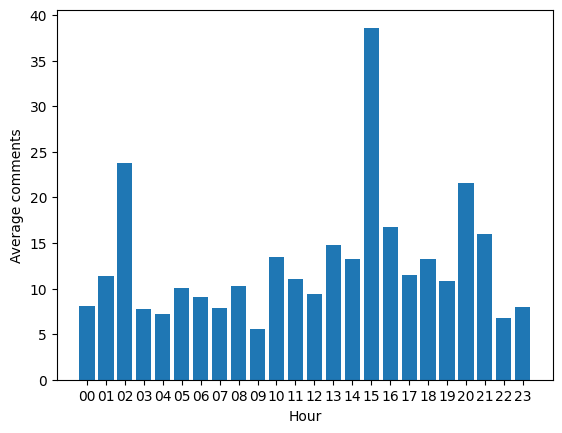

In [26]:
import matplotlib.pyplot as plt
keys = []
values = []
for element in avg_comments_per_hour:
    keys.append(element[0])
    values.append(element[1])

plt.bar(keys,values)
plt.xlabel("Hour")
plt.ylabel("Average comments")




In [27]:
swap_avg_per_hour = []
for row in avg_comments_per_hour:
    swap_avg_per_hour.append([row[1],row[0]])

swap_avg_per_hour = sorted(swap_avg_per_hour,reverse = True)

format = "{hour}:00 - {number} average comments per post"
formated_avg_per_hour = []
for row in swap_avg_per_hour:
    string=format.format(hour=row[1],number=round(row[0],2))
    formated_avg_per_hour.append(string)
    print(string)


15:00 - 38.59 average comments per post
02:00 - 23.81 average comments per post
20:00 - 21.52 average comments per post
16:00 - 16.8 average comments per post
21:00 - 16.01 average comments per post
13:00 - 14.74 average comments per post
10:00 - 13.44 average comments per post
14:00 - 13.23 average comments per post
18:00 - 13.2 average comments per post
17:00 - 11.46 average comments per post
01:00 - 11.38 average comments per post
11:00 - 11.05 average comments per post
19:00 - 10.8 average comments per post
08:00 - 10.25 average comments per post
05:00 - 10.09 average comments per post
12:00 - 9.41 average comments per post
06:00 - 9.02 average comments per post
00:00 - 8.13 average comments per post
23:00 - 7.99 average comments per post
07:00 - 7.85 average comments per post
03:00 - 7.8 average comments per post
04:00 - 7.17 average comments per post
22:00 - 6.75 average comments per post
09:00 - 5.58 average comments per post
